In [ ]:
%pip install lasio
%pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import os
import glob
import lasio
import pandas as pd

# Pembacaan Data
paths = sorted(glob.glob(os.path.join("Add Path Your File .las", "*.las")))

well_df = [0]*4
for i in range(len(paths)):
  well = lasio.read(paths[i])
  df = well.df()
  well_df[i] = df.reset_index()
well1, well2, well3, well4 = well_df

In [ ]:
print(well1, well2, well3, well4)

              DEPT  LITHOLOGY_GEOLINK    DCAL     CALI         BS    DRHO  \
0       439.113190                NaN -6.8906  19.1094  26.000002     NaN   
1       439.265594                NaN -6.9062  19.0938  26.000002     NaN   
2       439.417999                NaN -6.8906  19.1094  26.000002     NaN   
3       439.570404                NaN -6.8906  19.1094  26.000002     NaN   
4       439.722809                NaN -6.8906  19.1094  26.000002     NaN   
...            ...                ...     ...      ...        ...     ...   
17830  3156.405273                NaN -2.9805   5.5195   8.500000 -0.0309   
17831  3156.557617                NaN -2.9805   5.5195   8.500000 -0.0317   
17832  3156.709961                NaN -2.9805   5.5195   8.500000 -0.0325   
17833  3156.862549                NaN -2.9805   5.5195   8.500000 -0.0360   
17834  3157.014893                NaN -2.9805   5.5195   8.500000 -0.0327   

       NPHI    RHOB        PEF         GR         DTC       RDEP         SP

In [ ]:
#Batas atas
low = [439.11318970, 2766.8217773, 415.13760376, 2607.0031738]

#Batas bawah
up = [3157.0148926, 3149.9555664, 2850.0324707, 3027.1701660]

In [ ]:
# kolom parameter yang ingin di-train
train_cols = ['DEPT', 'CALI', 'GR', 'RDEP', 'NPHI', 'RHOB', 'SP', 'DTC', 'PEF', 'LITHOLOGY_GEOLINK']

# kolom parameter yang mau di-test
test_cols = ['DEPT', 'CALI', 'GR', 'RDEP', 'NPHI', 'RHOB', 'SP', 'DTC', 'PEF']

well_df_restrict = [0] * 4

for i in range(len(well_df)):
    # Memastikan kolom 'DEPT' ada dalam DataFrame
    if 'DEPT' not in well_df[i]:
        continue

    # Memilih kolom yang ada dalam DataFrame
    selected_cols = list(set(train_cols + test_cols).intersection(well_df[i].columns))

    # Memotong DataFrame dengan menggunakan loc
    df = well_df[i].loc[(well_df[i]['DEPT'] >= low[i]) & (well_df[i]['DEPT'] <= up[i]), selected_cols]
    well_df_restrict[i] = df.reset_index(drop=True)

well1, well2, well3, well4 = well_df_restrict

# data digabung
well_train = pd.concat([well1, well2, well3, well4])
well_pred = well4

In [ ]:
print(well_train)

             GR     CALI    RHOB         DEPT         DTC    RDEP     PEF  \
0     55.661900  19.1094     NaN   439.113190  150.811295  2.0197     NaN   
1     53.783501  19.0938     NaN   439.265594  150.089401  2.0273     NaN   
2     51.397301  19.1094     NaN   439.417999  152.821198  2.0352     NaN   
3     49.438900  19.1094     NaN   439.570404  153.628296  2.0430     NaN   
4     50.181999  19.1094     NaN   439.722809  156.178711  2.0504     NaN   
...         ...      ...     ...          ...         ...     ...     ...   
2753  36.328300   8.5709  2.3988  3026.560547         NaN     NaN  3.5303   
2754  32.398800   8.5739  2.3646  3026.712891         NaN     NaN  3.3999   
2755  30.337799   8.5664  2.3461  3026.865234         NaN     NaN  3.4521   
2756  29.622601   8.5598  2.3441  3027.017822         NaN     NaN  3.3985   
2757  28.857201   8.5660  2.3548  3027.170166         NaN     NaN  3.4068   

      LITHOLOGY_GEOLINK         SP  NPHI  
0                   NaN  50.4734

In [ ]:
print(well_pred)

             GR       CALI    RHOB         DEPT        DTC    RDEP     PEF  \
0     26.150499  12.250001     NaN  2607.003174  24.497231  1.4087     NaN   
1     32.192902  12.250001     NaN  2607.155518  23.912382  1.3376     NaN   
2     34.445301  12.250001     NaN  2607.307861  23.788725  1.4523     NaN   
3     29.497000  12.250001     NaN  2607.460205  23.135050  1.8369     NaN   
4     23.819599  12.250001     NaN  2607.612793  22.007475  2.2066     NaN   
...         ...        ...     ...          ...        ...     ...     ...   
2753  36.328300   8.570900  2.3988  3026.560547        NaN     NaN  3.5303   
2754  32.398800   8.573900  2.3646  3026.712891        NaN     NaN  3.3999   
2755  30.337799   8.566400  2.3461  3026.865234        NaN     NaN  3.4521   
2756  29.622601   8.559800  2.3441  3027.017822        NaN     NaN  3.3985   
2757  28.857201   8.566000  2.3548  3027.170166        NaN     NaN  3.4068   

      LITHOLOGY_GEOLINK  NPHI  
0                   9.0   NaN  

In [ ]:
import numpy as np
import numpy.random

# nama well
names = ['16_10-1', '16_10-2', '16_10-3', '16_10-5']

names_train = []
names_pred = []

for i in range(len(well_df_restrict)):
    if i == 0 or i == 1 or i == 3 or i == 4 or i == 5 or i == 6 or i == 7 or i == 8 or i == 9 or i == 10 or i == 11 or i == 12 or i == 13 or i == 14:
        # nama well dimasukkan untuk data training
        _ = np.full(len(well_df_restrict[i]), names[i])
        names_train.append(_)
    else:
        # nama well dimasukkan untuk data test
        _ = np.full(len(well_df_restrict[i]), names[i])
        names_pred.append(_)


In [ ]:
# Hilangkan missing value pada data train
well_train.dropna(inplace=True)

In [ ]:
# data digabung di dalam list
import itertools
names_train = list(itertools.chain.from_iterable(names_train))
names_pred = list(itertools.chain.from_iterable(names_pred))

In [ ]:
# Mengulang nama well dan menambahkannya ke kolom WELL
well_train['WELL'] = np.repeat(names, len(well_train) // len(names) + 1)[:len(well_train)]
well_pred['WELL'] = np.repeat(names, len(well_pred) // len(names) + 1)[:len(well_pred)]

In [ ]:
#check data
well_train

,GR,CALI,RHOB,DEPT,DTC,RDEP,PEF,LITHOLOGY_GEOLINK,SP,NPHI,WELL
11024,78.495300,14.632801,2.243300,2119.170898,136.527695,0.423100,5.823054,6.0,89.599899,0.422700,16_10-1
11025,76.346603,13.296899,2.247800,2119.323242,136.034103,0.452600,5.084322,6.0,90.439903,0.390900,16_10-1
11026,73.985199,12.953101,2.248200,2119.475586,136.126907,0.501500,4.617256,5.0,91.010468,0.393400,16_10-1
11027,66.501801,13.132800,2.252100,2119.628174,133.005707,0.539700,4.130027,5.0,91.740509,0.368900,16_10-1
11028,66.862701,12.968800,2.263600,2119.780518,129.994095,0.562900,4.028082,5.0,92.570000,0.395900,16_10-1
...,...,...,...,...,...,...,...,...,...,...,...
2388,38.618919,8.304660,2.271788,3130.753174,85.299294,0.525443,5.141180,4.0,71.427200,0.227763,16_10-5
2389,35.191139,8.289096,2.280970,3130.905518,84.900421,0.556119,5.453542,4.0,72.673668,0.221748,16_10-5
2390,33.188881,8.304677,2.313890,3131.058105,83.401031,0.600066,5.648303,4.0,74.423767,0.212794,16_10-5
2391,33.093781,8.296878,2.377502,3131.210449,82.600288,0.647445,5.523478,4.0,76.299393,0.220566,16_10-5


In [ ]:
#check data
well_pred.describe()

,GR,CALI,RHOB,DEPT,DTC,RDEP,PEF,LITHOLOGY_GEOLINK,NPHI
count,2758.000000,2758.000000,2595.000000,2758.000000,2656.000000,2748.000000,2595.000000,2741.000000,2647.000000
mean,84.561756,8.725043,2.433256,2817.086598,27.906240,1.487577,6.778493,7.908428,0.254548
std,70.384576,0.731461,0.126583,121.357714,4.962058,0.916881,1.458414,4.381781,0.106103
min,8.439100,8.508800,2.060800,2607.003174,18.116062,0.122600,3.296900,1.000000,0.068500
25%,36.252100,8.542000,2.318200,2712.044922,23.961569,1.069750,6.092050,6.000000,0.163600
50%,55.296099,8.554900,2.470700,2817.086670,27.046809,1.424100,7.196300,9.000000,0.236400
75%,103.513977,8.575200,2.540750,2922.128174,30.859087,1.895800,7.819150,13.000000,0.322200
max,318.167297,12.250001,2.698000,3027.170166,39.410393,7.272900,10.499400,16.000000,0.562500


<Axes: >

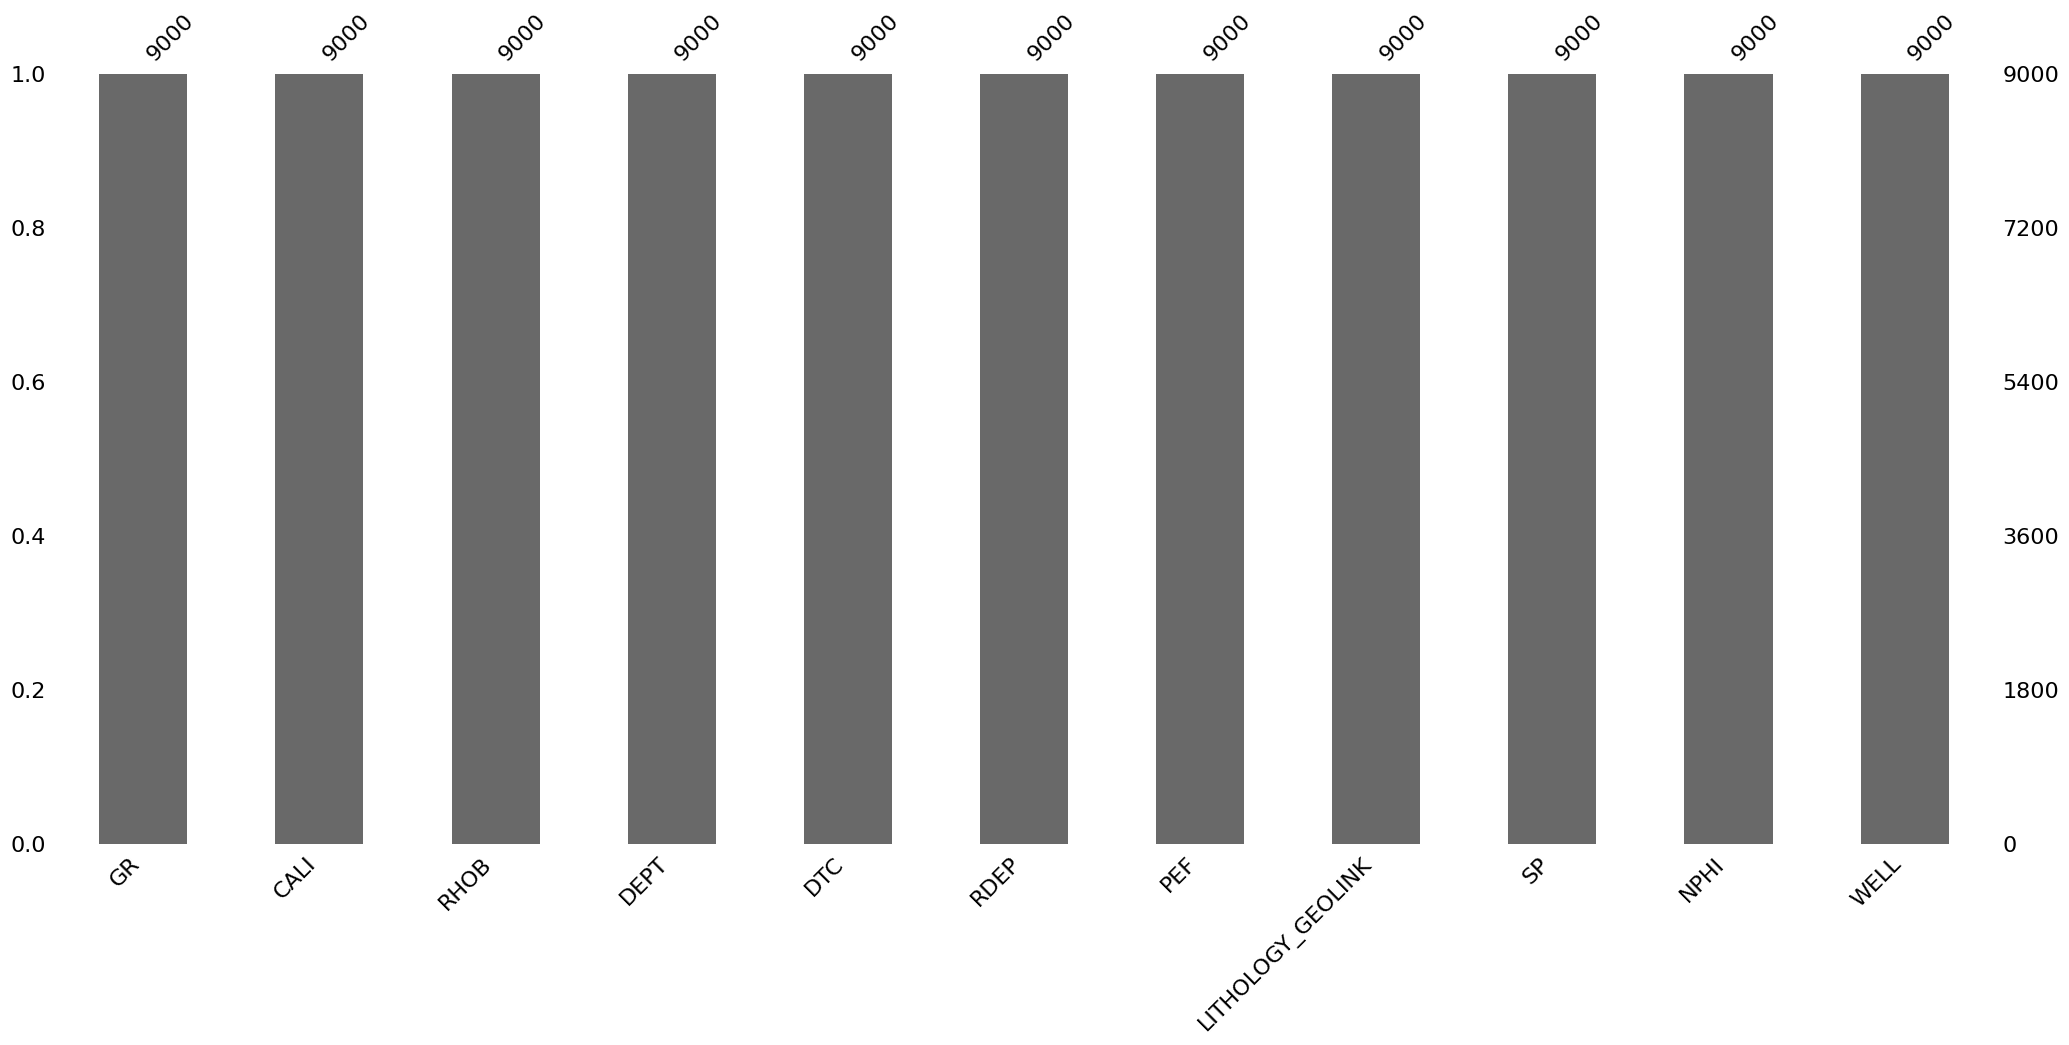

In [ ]:
import missingno as msno
# Missing Data train
msno.bar(well_train)

In [ ]:
# Hilangkan missing value pada data pred
well_pred.dropna(inplace=True)

In [ ]:
# pindah kolom dept ke kanan
depth_train, depth_pred = well_train.pop('DEPT'), well_pred.pop('DEPT')
well_train['DEPT'], well_pred['DEPT'] = depth_train, depth_pred

<ipython-input-19-bcae6678f07a>:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




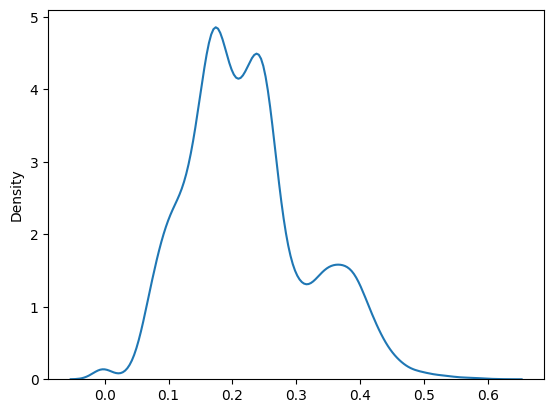

In [ ]:
import plotly.graph_objects as go
import seaborn as sns

#Perika Distribusi
fig = go.Figure(data=go.Splom(dimensions=[dict(label='CALI',
values=well_train['CALI']),
 dict(label='GR', values=well_train['GR']),
 dict(label='RDEP', values=well_train['RDEP']),
 dict(label='NPHI', values=well_train['NPHI']),
 dict(label='RHOB', values=well_train['RHOB']),
 dict(label='SP', values=well_train['SP']),
 dict(label='PEF', values=well_train['PEF']),
 dict(label='FACIES', values=well_train['LITHOLOGY_GEOLINK']),
 dict(label='DT', values=well_train['DTC'])],
 marker=dict(size=5,

line=dict(width=0.5)),
 diagonal=dict(visible=True),
showupperhalf=False))
title = "Distribution Plot of Well Training"
fig.update_layout(title=title,
 dragmode='select',
 width=1000,
height=1000,
 hovermode='closest')
fig.show()
sns.distplot(well_train[['NPHI']], hist=False)
fig = sns.set(rc={'figure.figsize':(3,3)})

In [ ]:
import plotly.figure_factory as ff

# Korelasi Spearman
train_features = ['CALI', 'GR', 'RDEP', 'NPHI', 'RHOB', 'SP', 'DTC', 'PEF']
corr = well_train[train_features].corr(method='spearman').round(3)
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)
fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(),
                                   x=df_mask.columns.tolist(),
                                   y=df_mask.columns.tolist(),
                                   colorscale='ice',
                                   showscale=True, ygap=1, xgap=1, zmid=0
                                   )
fig.update_xaxes(side="bottom")
fig.update_layout(
    title_text='Korelasi Spearman untuk Setiap Parameter',
    title_x=0.5,
    width=1000,
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()


In [ ]:
#Normalisasi
colnames = well_train.columns
only_feature = ['CALI', 'GR', 'RDEP', 'NPHI','RHOB','SP', 'DTC', 'PEF']
only_target = 'LITHOLOGY_GEOLINK'
feature_target = np.append(only_feature, only_target)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
#Transformasi Logaritmik
well_train['RDEP'] = np.log10(well_train['RDEP'])

In [ ]:
#Normalisasi Yeo-Johnson
scaler = PowerTransformer(method='yeo-johnson')
column_drop = ['WELL', 'DEPT']
ct = ColumnTransformer([('transform', scaler, feature_target)],
remainder='passthrough')
well_train_norm = ct.fit_transform(well_train)
well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm
x = well_train_norm[feature_target].astype(float)
y = well_train_norm['WELL'].astype(str)
z = well_train_norm['DEPT'].astype(float)
well_train_norm = pd.concat([x, y, z], axis=1)
well_train_drop = well_train_norm.copy()
well_train_drop = well_train_norm.drop(['WELL', 'DEPT'], axis=1)

<ipython-input-24-b7bda781b887>:24: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




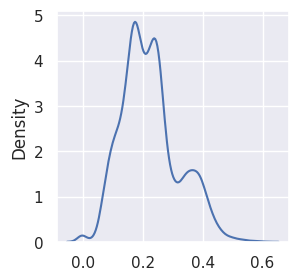

In [ ]:
#Perika Distribusi
fig = go.Figure(data=go.Splom(dimensions=[dict(label='CALI',
values=well_train['CALI']),
 dict(label='GR', values=well_train['GR']),
 dict(label='RDEP', values=well_train['RDEP']),
 dict(label='NPHI', values=well_train['NPHI']),
 dict(label='RHOB', values=well_train['RHOB']),
 dict(label='SP', values=well_train['SP']),
 dict(label='PEF', values=well_train['PEF']),
 dict(label='FACIES', values=well_train['LITHOLOGY_GEOLINK']),
 dict(label='DT', values=well_train['DTC'])],
 marker=dict(size=5,

line=dict(width=0.5)),
 diagonal=dict(visible=True),
showupperhalf=False))
title = "Distribution Plot of Well Training"
fig.update_layout(title=title,
 dragmode='select',
 width=1000,
height=1000,
 hovermode='closest')
fig.show()
sns.distplot(well_train[['NPHI']], hist=False)
fig = sns.set(rc={'figure.figsize':(3,3)})

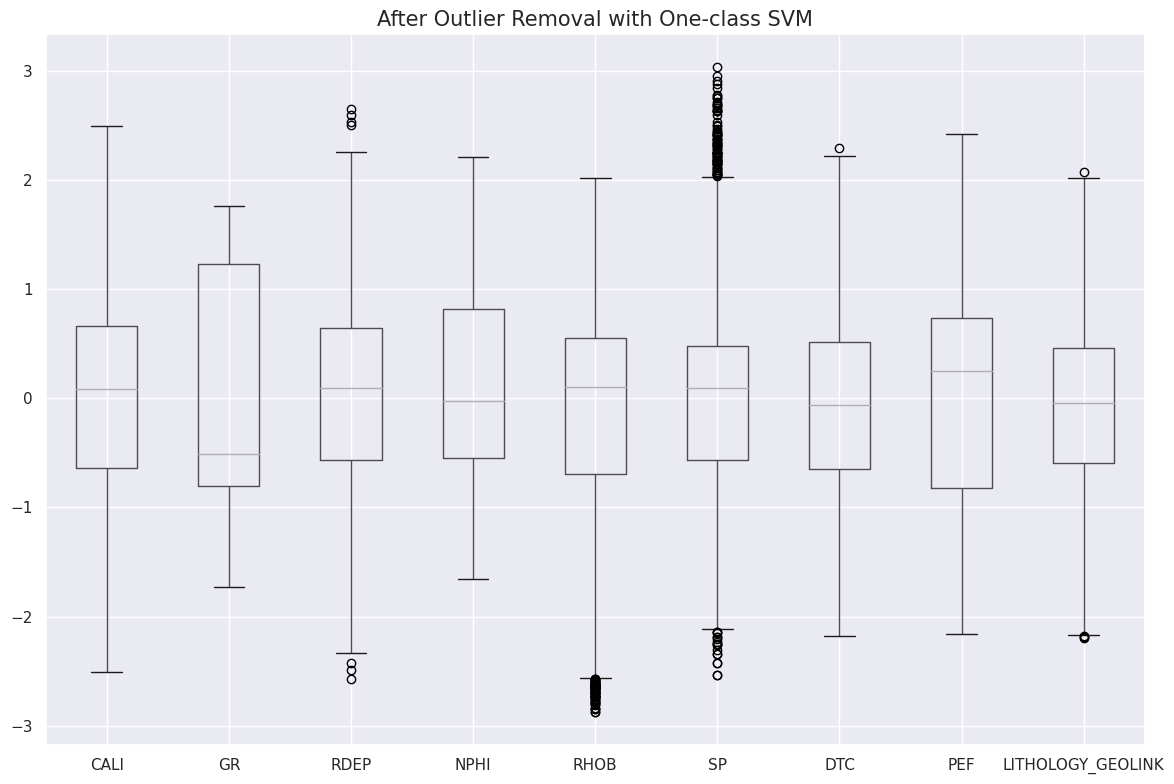

In [ ]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

# Menyesuaikan ukuran plot
plt.figure(figsize=(12, 8))

# Membuat subplot
plt.subplot(1, 1, 1)

# Membuat boxplot
well_train_svm[feature_target].boxplot()

# Menambahkan judul
plt.title('After Outlier Removal with One-class SVM', size=15)

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
#Column Remapping
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Silty Sand',
                 65000: 'CrossBedded Sand',
                 80000: 'Shaly Sand',
                 74000: 'Silt',
                 70000: 'Shaly Silt',
                 70032: 'Silty Shale',
                 88000: 'Shale',
                 86000: 'Chalk',
                 99000: 'Porous Limestone',
                 90000: 'Limestone',
                 93000: 'Argillaceous Limestone',
                 65111: 'Marlstone',
                 65101: 'Calcareous Shale',
                 80231: 'Dolomite',
                 74330: 'Calcareous Cement',
                 70021: 'Conglomerate',
                 70043: 'Coal',
                 88059: 'Cinerite',
                 86452: 'Volcanic Tuff',
                 99111: 'Halite',
                 90222: 'Anhydrite'}

simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12,
                 65111: 13,
                 65101: 14,
                 80231: 15,
                 74330: 16,
                 70021: 17,
                 70043: 18,
                 88059: 19,
                 86452: 20,
                 99111: 21,
                 90222: 22}

simplecb_lithology_numbers = {1: 'Sandstone',
                 2: 'Silty Sand',
                 3: 'Crossbedded Sand',
                 4: 'Shaly Sand',
                 5: 'Silt',
                 6: 'Shaly Silt',
                 7: 'Silty Shale',
                 8: 'Shale',
                 9: 'Chalk',
                 10: 'Porous Limestone',
                 11: 'Limestone',
                 12: 'Argillaceous Limestone',
                 13: 'Marlstone',
                 14: 'Calcalerous Shale',
                 15: 'Dolomite',
                 16: 'Calcalerous Cement',
                 17: 'Conglomerate',
                 18: 'Coal',
                 19: 'Cinerite',
                 20: 'Volcanic Stuff',
                 21: 'Halite',
                 22: 'Anhydrite'}

In [ ]:
well_train['LITH'] = well_train['LITHOLOGY_GEOLINK'].map(simplecb_lithology_numbers)

In [ ]:
well_train

,GR,CALI,RHOB,DTC,RDEP,PEF,LITHOLOGY_GEOLINK,SP,NPHI,WELL,DEPT,LITH
11024,78.495300,14.632801,2.243300,136.527695,-0.373557,5.823054,6.0,89.599899,0.422700,16_10-1,2119.170898,Shaly Silt
11025,76.346603,13.296899,2.247800,136.034103,-0.344285,5.084322,6.0,90.439903,0.390900,16_10-1,2119.323242,Shaly Silt
11026,73.985199,12.953101,2.248200,136.126907,-0.299729,4.617256,5.0,91.010468,0.393400,16_10-1,2119.475586,Silt
11027,66.501801,13.132800,2.252100,133.005707,-0.267848,4.130027,5.0,91.740509,0.368900,16_10-1,2119.628174,Silt
11028,66.862701,12.968800,2.263600,129.994095,-0.249569,4.028082,5.0,92.570000,0.395900,16_10-1,2119.780518,Silt
...,...,...,...,...,...,...,...,...,...,...,...,...
2388,38.618919,8.304660,2.271788,85.299294,-0.279474,5.141180,4.0,71.427200,0.227763,16_10-5,3130.753174,Shaly Sand
2389,35.191139,8.289096,2.280970,84.900421,-0.254832,5.453542,4.0,72.673668,0.221748,16_10-5,3130.905518,Shaly Sand
2390,33.188881,8.304677,2.313890,83.401031,-0.221801,5.648303,4.0,74.423767,0.212794,16_10-5,3131.058105,Shaly Sand
2391,33.093781,8.296878,2.377502,82.600288,-0.188797,5.523478,4.0,76.299393,0.220566,16_10-5,3131.210449,Shaly Sand


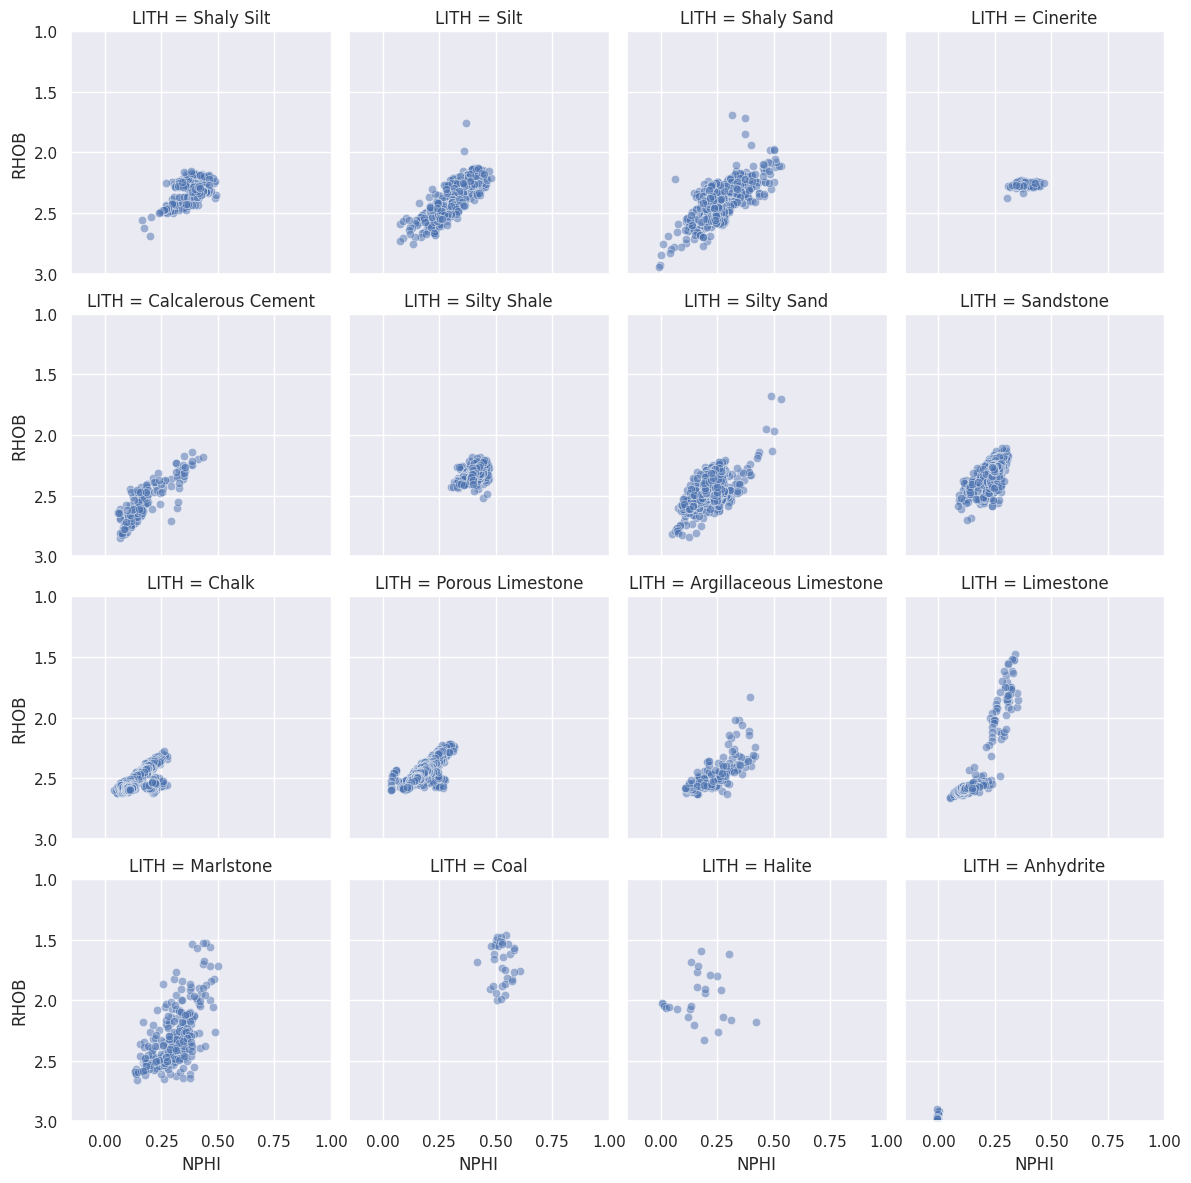

In [ ]:
g = sns.FacetGrid(well_train, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [ ]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)

    facies_color = ['yellow', 'lightyellow','gold','tan', 'lightsalmon','darkyellow', 'darkgreen', 'darkcyan', 'slateblue', 'slateblue','slateblue', 'dodgerblue', 'deepskyblue', 'darkcyan', 'cyan', 'cyan', 'lightyellow', 'black', 'cyan', 'tomato', 'pink', 'lightmagenta']


In [ ]:
well_train[well_train.WELL =='16_10-5'].drop(columns=['LITHOLOGY_GEOLINK','LITH']).columns

Index(['GR', 'CALI', 'RHOB', 'DTC', 'RDEP', 'PEF', 'SP', 'NPHI', 'WELL',
       'DEPT'],
      dtype='object')

In [ ]:
well_train[well_train.WELL =='16_10-5'].LITH

146      Marlstone
147      Marlstone
148      Marlstone
149      Marlstone
150      Marlstone
           ...    
2388    Shaly Sand
2389    Shaly Sand
2390    Shaly Sand
2391    Shaly Sand
2392    Shaly Sand
Name: LITH, Length: 2247, dtype: object

In [ ]:
y

0       16_10-1
1       16_10-1
2       16_10-1
3       16_10-1
4       16_10-1
         ...   
8995    16_10-5
8996    16_10-5
8997    16_10-5
8998    16_10-5
8999    16_10-5
Name: WELL, Length: 9000, dtype: object

# Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = well_train[well_train.WELL =='16_10-5'].drop(columns=['LITHOLOGY_GEOLINK','LITH']) # Sesuaikan 'litologi' dengan kolom label pada dataset Anda
y = well_train[well_train.WELL =='16_10-5'].LITH

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1797, 10), (450, 10), (1797,), (450,))

# Preprocessor

In [ ]:
%pip install xgboost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Class Integer

In [ ]:
class Integer:
    def __init__(self, low, high):
        if low > high:
            low, high = high, low
            warnings.warn("'low' is higher than 'high' so I flipped them for you")
        self.low = low
        self.high = high

    def rvs(self, random_state):
        rand_int = stats.randint(low=self.low, high=self.high+1)
        return rand_int.rvs(random_state=random_state)

    def __repr__(self):
        return f"Integer(low={self.low}, high={self.high})"

# Class Real

In [ ]:
from scipy import stats

class Real:
    def __init__(self, low, high, prior='uniform'):
        if low > high:
            low, high = high, low
            warnings.warn("'low' is higher than 'high' so I flipped them for you")
        self.low = low
        self.high = high
        self.prior = prior

    def rvs(self, random_state):
        uniform = self._uniform_inclusive(loc=self.low, scale=self.high - self.low)
        if self.prior == 'uniform':
            return uniform.rvs(random_state=random_state)
        elif self.prior == 'log-uniform':
            return np.power(10, uniform.rvs(random_state=random_state))
        else:
            raise Exception("Supported prior {'uniform', 'log-uniform'}")

    @staticmethod
    def _uniform_inclusive(loc, scale):
        return stats.uniform(loc=loc, scale=np.nextafter(scale, scale + 1.))

    def __repr__(self):
        return f"Real(low={self.low}, high={self.high}, prior='{self.prior}')"

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom label
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
well_train

,GR,CALI,RHOB,DTC,RDEP,PEF,LITHOLOGY_GEOLINK,SP,NPHI,WELL,DEPT,LITH
11024,78.495300,14.632801,2.243300,136.527695,-0.373557,5.823054,6.0,89.599899,0.422700,16_10-1,2119.170898,Shaly Silt
11025,76.346603,13.296899,2.247800,136.034103,-0.344285,5.084322,6.0,90.439903,0.390900,16_10-1,2119.323242,Shaly Silt
11026,73.985199,12.953101,2.248200,136.126907,-0.299729,4.617256,5.0,91.010468,0.393400,16_10-1,2119.475586,Silt
11027,66.501801,13.132800,2.252100,133.005707,-0.267848,4.130027,5.0,91.740509,0.368900,16_10-1,2119.628174,Silt
11028,66.862701,12.968800,2.263600,129.994095,-0.249569,4.028082,5.0,92.570000,0.395900,16_10-1,2119.780518,Silt
...,...,...,...,...,...,...,...,...,...,...,...,...
2388,38.618919,8.304660,2.271788,85.299294,-0.279474,5.141180,4.0,71.427200,0.227763,16_10-5,3130.753174,Shaly Sand
2389,35.191139,8.289096,2.280970,84.900421,-0.254832,5.453542,4.0,72.673668,0.221748,16_10-5,3130.905518,Shaly Sand
2390,33.188881,8.304677,2.313890,83.401031,-0.221801,5.648303,4.0,74.423767,0.212794,16_10-5,3131.058105,Shaly Sand
2391,33.093781,8.296878,2.377502,82.600288,-0.188797,5.523478,4.0,76.299393,0.220566,16_10-5,3131.210449,Shaly Sand


In [ ]:
# Preprocessor
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['RDEP', 'DTC', 'RHOB', 'NPHI', 'SP', 'CALI', 'GR', 'PEF', 'DEPT']),
    ('categoric', categorical_pipeline, ['WELL'])
])

# Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

# Parameter Tuning
parameter = {
        'algo__max_depth': Integer(low=1, high=10),
        'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
        'algo__n_estimators': Integer(low=100, high=200),
        'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
        'algo__gamma': Integer(low=1, high=10),
        'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
        'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
        'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train_encoded)

# Evaluation
print(model.best_params_)
print('Skor pada data pelatihan: ', model.score(X_train, y_train_encoded))
print('Best Skor: ', model.best_score_)
print('Skor pada data test: ', model.score(X_test, y_test_encoded))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
Skor pada data pelatihan:  0.9782971619365609
Best Skor:  0.7941012799109627
Skor pada data test:  0.7977777777777778


<ipython-input-42-443e59534a22>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



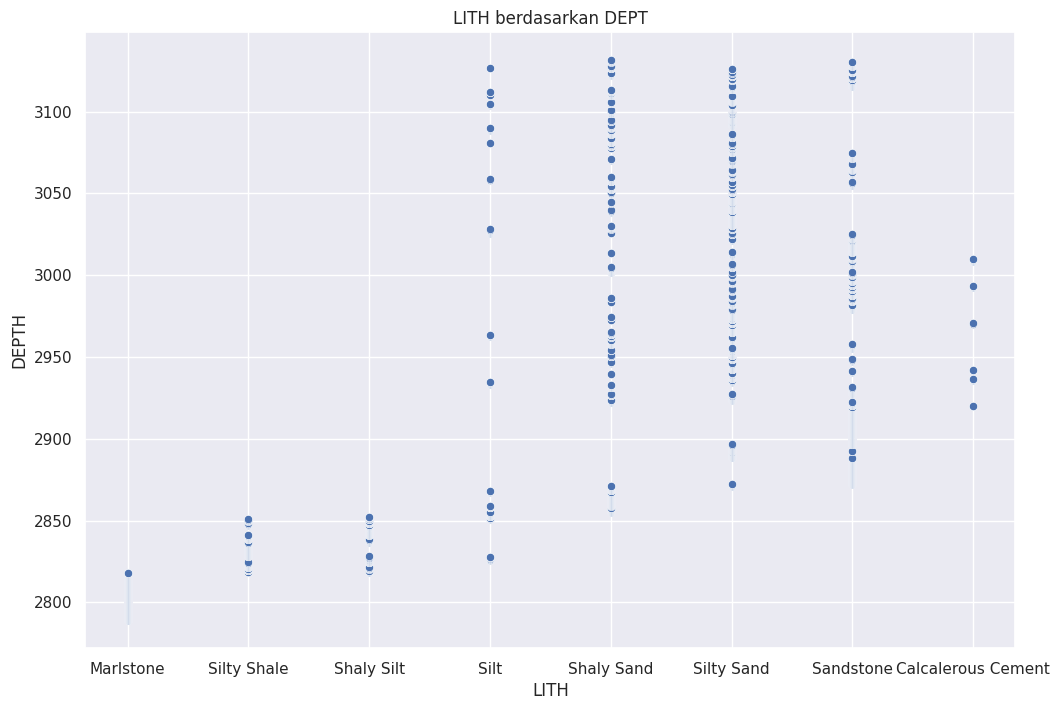

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot dengan warna berdasarkan prediksi WELL
plt.figure(figsize=(12, 8))
sns.scatterplot(x=well_train[well_train.WELL =='16_10-5'].LITH, y=well_train[well_train.WELL =='16_10-5'].DEPT, data=well_train, palette='viridis')
plt.xlabel('LITH')
plt.ylabel('DEPTH')
plt.title('LITH berdasarkan DEPT')
plt.show()

# Membuat Plot Klasifikasi

In [ ]:
well_train.loc[well_train['WELL'] == '16/10-5'].columns

Index(['GR', 'CALI', 'RHOB', 'DTC', 'RDEP', 'PEF', 'LITHOLOGY_GEOLINK', 'SP',
       'NPHI', 'WELL', 'DEPT', 'LITH'],
      dtype='object')

In [ ]:
data = well_train.loc[well_train['WELL'] == '16/10-5'][['GR', 'CALI', 'RHOB', 'DTC', 'RDEP', 'PEF', 'LITHOLOGY_GEOLINK', 'SP',
       'NPHI', 'WELL', 'DEPT', 'LITH']]

In [ ]:
data.drop('LITH', axis=1, inplace=True)
data

,GR,CALI,RHOB,DTC,RDEP,PEF,LITHOLOGY_GEOLINK,SP,NPHI,WELL,DEPT


In [ ]:
# Data lithology
lithology_numbers = {
    1: {'lith': 'Sandstone', 'lith_num': 1, 'hatch': '..', 'color': '#ffff00'},
    2: {'lith': 'Silty Sand', 'lith_num': 2, 'hatch': '-.', 'color': '#e6194B'},
    3: {'lith': 'Crossbedded Sand', 'lith_num': 3, 'hatch': '--', 'color': '#3cb44b'},
    4: {'lith': 'Shaly Sand', 'lith_num': 4, 'hatch': '-\\', 'color': '#4363d8'},
    5: {'lith': 'Silt', 'lith_num': 5, 'hatch': '-/', 'color': '#f58231'},
    6: {'lith': 'Shaly Silt', 'lith_num': 6, 'hatch': '+', 'color': '#42d4f4'},
    7: {'lith': 'Silty Shale', 'lith_num': 7, 'hatch': '..', 'color': '#f032e6'},
    8: {'lith': 'Shale', 'lith_num': 8, 'hatch': 'x', 'color': '#aaffc3'},
    9: {'lith': 'Chalk', 'lith_num': 9, 'hatch': 'o-', 'color': '#bfef45'},
    10: {'lith': 'Porous Limestone', 'lith_num': 10, 'hatch': '||', 'color': '#ff9f00'},
    11: {'lith': 'Limestone', 'lith_num': 11, 'hatch': 'xx', 'color': '#000000'},
    12: {'lith': 'Argillaceous Limestone', 'lith_num': 12, 'hatch': '-|', 'color': '#800000'},
    13: {'lith': 'Marlstone', 'lith_num': 13, 'hatch': '+|', 'color': '#FFD700'},
    14: {'lith': 'Calcalerous Shale', 'lith_num': 14, 'hatch': '|', 'color': '#808080'},
    15: {'lith': 'Dolomite', 'lith_num': 15, 'hatch': '///', 'color': '#00FFFF'},
    16: {'lith': 'Calcalerous Cement', 'lith_num': 16, 'hatch': '\\\\', 'color': '#800080'},
    17: {'lith': 'Conglomerate', 'lith_num': 17, 'hatch': '---', 'color': '#00FF00'},
    18: {'lith': 'Coal', 'lith_num': 18, 'hatch': 'xxx', 'color': '#FF6347'},
    19: {'lith': 'Cinerite', 'lith_num': 19, 'hatch': 'OOO', 'color': '#8B4513'},
    20: {'lith': 'Volcanic Stuff', 'lith_num': 20, 'hatch': '**', 'color': '#B0C4DE'},
    21: {'lith': 'Halite', 'lith_num': 21, 'hatch': 'O.', 'color': '#FFA07A'},
    22: {'lith': 'Anhydrite', 'lith_num': 22, 'hatch': '*-', 'color': '#DAA520'}
}

In [ ]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

,lith,lith_num,hatch,color
LITHOLOGY,,,,
1,Sandstone,1,..,#ffff00
2,Silty Sand,2,-.,#e6194B
3,Crossbedded Sand,3,--,#3cb44b
4,Shaly Sand,4,-\,#4363d8
5,Silt,5,-/,#f58231
6,Shaly Silt,6,+,#42d4f4
7,Silty Shale,7,..,#f032e6
8,Shale,8,x,#aaffc3
9,Chalk,9,o-,#bfef45


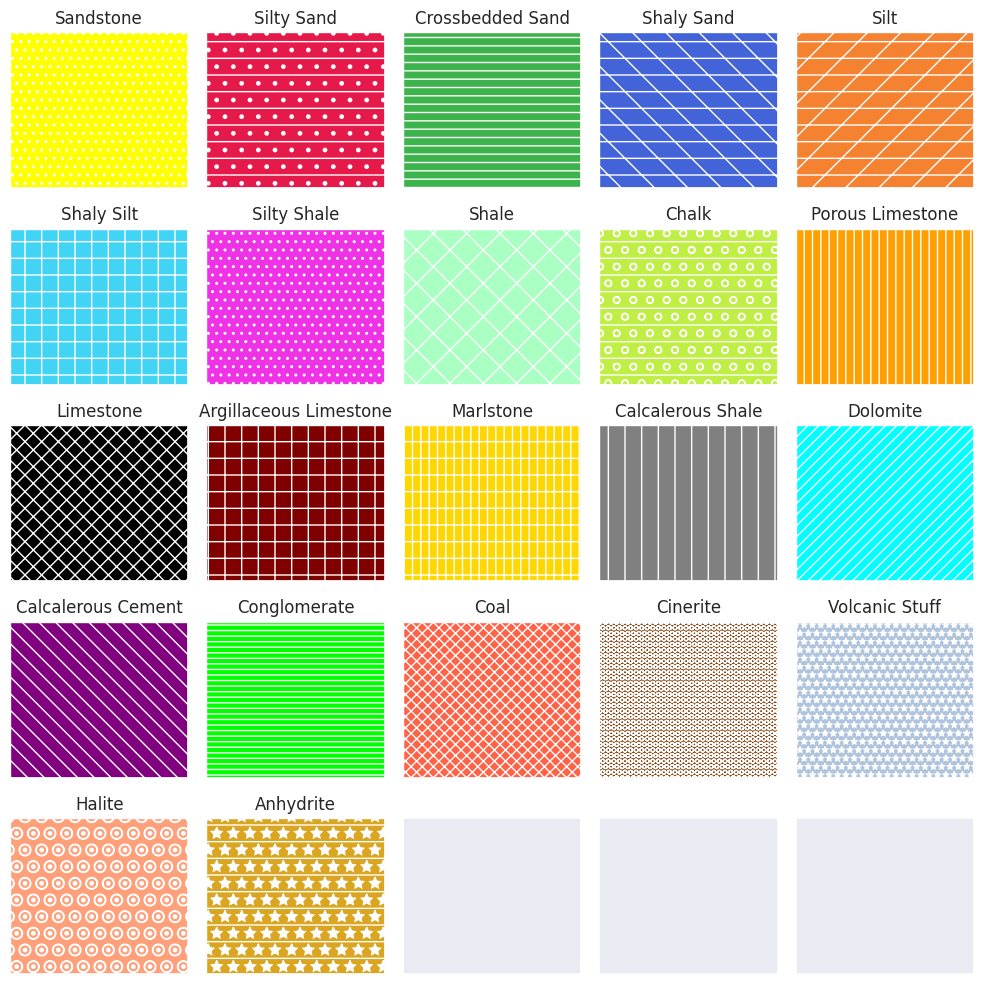

In [ ]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=5,nrows=5, sharex=True, sharey=True,
                         figsize=(10,10), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()
